Feature engineering to select the best features for the health and wellness classifier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn import preprocessing
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler

In [3]:
selected = pd.read_csv('base_final.csv')

In [4]:
list(selected)

['Max AQI',
 '90th Percentile AQI',
 'Median AQI',
 'BED_UTILIZATION',
 'WA_MALE',
 'WA_FEMALE',
 'BA_MALE',
 'BA_FEMALE',
 'IA_MALE',
 'IA_FEMALE',
 'AA_MALE',
 'AA_FEMALE',
 'NA_MALE',
 'NA_FEMALE',
 'HLTHOUTArthritis',
 'HLTHOUTCOPD',
 'HLTHOUTCancer (except skin)',
 'HLTHOUTChronic Kidney Disease',
 'HLTHOUTCoronary Heart Disease',
 'HLTHOUTCurrent Asthma',
 'HLTHOUTDiabetes',
 'HLTHOUTMental Health',
 'HLTHOUTPhysical Health',
 'HLTHOUTStroke',
 'HLTHOUTTeeth Loss',
 'PREVENTAnnual Checkup',
 'PREVENTCervical Cancer Screening',
 'PREVENTColorectal Cancer Screening',
 'PREVENTCore preventive services for older men',
 'PREVENTCore preventive services for older women',
 'PREVENTDental Visit',
 'PREVENTHealth Insurance',
 'PREVENTMammography',
 'UNHBEHBinge Drinking',
 'UNHBEHCurrent Smoking',
 'UNHBEHObesity',
 'UNHBEHPhysical Inactivity',
 'UNHBEHSleep <7 hours',
 'noise_mean',
 'case_fatality',
 'PCTUI_Pov',
 'Pov%',
 'OTHER_MALE',
 'OTHER_FEMALE']

In [5]:
selected.shape

(3142, 44)

In [6]:
#view of the data
selected.head(5)

,Max AQI,90th Percentile AQI,Median AQI,BED_UTILIZATION,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,...,UNHBEHCurrent Smoking,UNHBEHObesity,UNHBEHPhysical Inactivity,UNHBEHSleep <7 hours,noise_mean,case_fatality,PCTUI_Pov,Pov%,OTHER_MALE,OTHER_FEMALE
0,NaN,NaN,NaN,0.623113,20878.0,21729.0,5237.0,6000.0,121.0,145.0,...,19.8,35.5,26.4,38.4,86.665211,0.011949,20.0,0.201781,538.0,507.0
1,74.0,48.0,37.0,2.254794,94810.0,100388.0,9486.0,10107.0,903.0,839.0,...,18.5,29.4,23.5,36.4,47.636945,0.012346,25.7,0.182297,2042.0,2125.0
2,NaN,NaN,NaN,0.430640,6389.0,5745.0,6311.0,5595.0,103.0,67.0,...,25.5,40.8,36.8,40.9,64.315150,0.021254,18.5,0.378581,172.0,136.0
3,NaN,NaN,NaN,0.376219,8766.0,8425.0,2941.0,1822.0,53.0,50.0,...,23.1,38.4,31.2,40.1,58.173180,0.022697,17.5,0.265817,124.0,139.0
4,NaN,NaN,NaN,0.499069,27258.0,28154.0,516.0,462.0,192.0,178.0,...,23.0,33.7,30.1,38.8,54.338911,0.017038,25.2,0.227849,379.0,435.0


In [7]:
#columns of the dataset
selected.columns

Index(['Max AQI', '90th Percentile AQI', 'Median AQI', 'BED_UTILIZATION',
       'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE',
       'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'HLTHOUTArthritis',
       'HLTHOUTCOPD', 'HLTHOUTCancer (except skin)',
       'HLTHOUTChronic Kidney Disease', 'HLTHOUTCoronary Heart Disease',
       'HLTHOUTCurrent Asthma', 'HLTHOUTDiabetes', 'HLTHOUTMental Health',
       'HLTHOUTPhysical Health', 'HLTHOUTStroke', 'HLTHOUTTeeth Loss',
       'PREVENTAnnual Checkup', 'PREVENTCervical Cancer Screening',
       'PREVENTColorectal Cancer Screening',
       'PREVENTCore preventive services for older men',
       'PREVENTCore preventive services for older women',
       'PREVENTDental Visit', 'PREVENTHealth Insurance', 'PREVENTMammography',
       'UNHBEHBinge Drinking', 'UNHBEHCurrent Smoking', 'UNHBEHObesity',
       'UNHBEHPhysical Inactivity', 'UNHBEHSleep <7 hours', 'noise_mean',
       'case_fatality', 'PCTUI_Pov', 'Pov%', 'O

In [8]:
#drop all rows with null values
selected.dropna(axis =0, inplace =True)

In [9]:
selected['case_fatality'].isna().sum()

0

In [12]:
#normalization
nor = preprocessing.MinMaxScaler()
np_scale = nor.fit_transform(selected)
#np_scale = nor.fit_transform(selected_1)
selected = pd.DataFrame(np_scale, columns=selected.columns)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
#standardization
names = selected.columns
scaler = preprocessing.StandardScaler()
scaled_selected = scaler.fit_transform(selected)
selected = pd.DataFrame(scaled_selected, columns=selected.columns)

In [15]:
dz = ['case_fatality', 'UNHBEHBinge Drinking','HLTHOUTPhysical Health', 'HLTHOUTTeeth Loss', 'HLTHOUTStroke', 'BED_UTILIZATION', 'PREVENTCervical Cancer Screening', '90th Percentile AQI','UNHBEHCurrent Smoking', 'HLTHOUTCOPD', 'NA_MALE']

In [16]:
Y = selected.case_fatality.values
#Y1 = np.nan_to_num(Y)
t = selected.drop(dz, 1)
X = t.values
#X1 = np.nan_to_num(X)
colnames = t.columns

In [17]:
selected.shape

(647, 44)

In [18]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [19]:
# Construct our Linear Regression model with Recursice Feature Elimination (RFE)
from sklearn.feature_selection import RFE, f_regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=18, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.


In [20]:
# Linear Regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Lasso
lasso = Lasso(alpha= .05)
lasso.fit(X,Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [21]:
#Creating the Feature Ranking Matrix

# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RFE	Ridge	Mean
Max AQI	0.0	0.01	0.13	0.04	0.05
Median AQI	0.0	0.02	0.53	0.08	0.16
WA_MALE	0.0	0.86	1.0	0.08	0.48
WA_FEMALE	0.0	1.0	1.0	0.36	0.59
BA_MALE	0.0	0.33	1.0	0.12	0.36
BA_FEMALE	0.0	0.37	1.0	0.07	0.36
IA_MALE	0.0	0.28	1.0	0.31	0.4
IA_FEMALE	0.0	0.23	1.0	0.09	0.33
AA_MALE	0.0	0.04	0.4	0.07	0.13
AA_FEMALE	0.0	0.14	1.0	0.12	0.32
NA_FEMALE	0.0	0.11	1.0	0.09	0.3
HLTHOUTArthritis	0.0	0.04	0.73	0.24	0.25
HLTHOUTCancer (except skin)	0.0	0.0	0.0	0.0	0.0
HLTHOUTChronic Kidney Disease	0.0	0.24	1.0	0.72	0.49
HLTHOUTCoronary Heart Disease	0.0	0.12	0.93	0.46	0.38
HLTHOUTCurrent Asthma	0.52	0.14	1.0	0.59	0.56
HLTHOUTDiabetes	0.0	0.28	1.0	0.97	0.56
HLTHOUTMental Health	0.0	0.06	0.87	0.26	0.3
PREVENTAnnual Checkup	1.0	0.24	1.0	1.0	0.81
PREVENTColorectal Cancer Screening	0.0	0.05	1.0	0.19	0.31
PREVENTCore preventive services for older men	0.24	0.01	0.07	0.0	0.08
PREVENTCore preventive services for older women	0.51	0.02	0.33	0.12	0.24
PREVENTDental Visit	0.0	0.04	0.67	0.13	0.21
PREV

In [22]:
#Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False).reset_index(drop=True)

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(meanplot)

,Feature,Mean Ranking
0,PREVENTAnnual Checkup,0.81
1,WA_FEMALE,0.59
2,HLTHOUTDiabetes,0.56
3,HLTHOUTCurrent Asthma,0.56
4,OTHER_MALE,0.51
5,HLTHOUTChronic Kidney Disease,0.49
6,WA_MALE,0.48
7,PREVENTHealth Insurance,0.47
8,PCTUI_Pov,0.46
9,OTHER_FEMALE,0.42


In [48]:
meanplot['Feature'].unique()

array(['PREVENTAnnual Checkup', 'WA_FEMALE', 'HLTHOUTDiabetes',
       'HLTHOUTCurrent Asthma', 'OTHER_MALE',
       'HLTHOUTChronic Kidney Disease', 'WA_MALE',
       'PREVENTHealth Insurance', 'PCTUI_Pov', 'OTHER_FEMALE', 'IA_MALE',
       'HLTHOUTCoronary Heart Disease', 'BA_MALE', 'BA_FEMALE', 'Pov%',
       'IA_FEMALE', 'AA_FEMALE', 'PREVENTColorectal Cancer Screening',
       'NA_FEMALE', 'HLTHOUTMental Health', 'PREVENTMammography',
       'HLTHOUTArthritis',
       'PREVENTCore preventive services for older women',
       'PREVENTDental Visit', 'UNHBEHSleep <7 hours', 'Median AQI',
       'UNHBEHObesity', 'AA_MALE', 'noise_mean',
       'PREVENTCore preventive services for older men',
       'UNHBEHPhysical Inactivity', 'Max AQI',
       'HLTHOUTCancer (except skin)'], dtype=object)

In [24]:
std = preprocessing.StandardScaler()
# X is a matrix
std.fit(X)
X_std = std.transform(X)

In [25]:
#scale data
minmax = preprocessing.MinMaxScaler()
minmax.fit(X)
X_minmax = minmax.transform(X)

In [26]:
#divide data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_minmax, Y,
                                                    test_size=0.25,
                                                    random_state=50)
#maybe bump up the test_size to 70/30 etc...
#look at r2 and mse and the coefficient

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
#linear model
lr = LinearRegression()

In [29]:
#fit model to data
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
pred_y = lr.predict(test_x)

In [31]:
#calculate mean squared error, results looks like a lot of overfitting
mse = metrics.mean_squared_error(test_y, pred_y)
print("Mean Squared Error {}".format(mse))

Mean Squared Error 0.8533892275685345


In [32]:
len(pred_y)

162

In [33]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=33, n_informative=18, n_redundant=5, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.765 (0.039)


In [34]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=18)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected False, Rank: 12.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 5.000
Column: 4, Selected False, Rank: 4.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected False, Rank: 13.000
Column: 7, Selected False, Rank: 8.000
Column: 8, Selected False, Rank: 11.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 7.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 14.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 15.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 16.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selec

In [35]:
#>>> selector.ranking_

Automatically created module for IPython interactive environment
Optimal number of features : 22


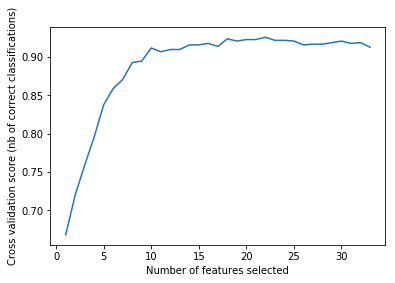

In [36]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=33, n_informative=18,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()


In [37]:

import numpy as np
g_scores = rfecv.grid_scores_
indices = np.argsort(g_scores)[::-1]
print('Printing RFECV results:')
for f in range(X.shape[1]):
    print("%d. Number of features: %d; Grid_Score: %f" % (f + 1, indices[f]+1, g_scores[indices[f]]))

Printing RFECV results:
1. Number of features: 22; Grid_Score: 0.926024
2. Number of features: 18; Grid_Score: 0.924008
3. Number of features: 21; Grid_Score: 0.923002
4. Number of features: 20; Grid_Score: 0.922998
5. Number of features: 24; Grid_Score: 0.922000
6. Number of features: 23; Grid_Score: 0.922000
7. Number of features: 19; Grid_Score: 0.921014
8. Number of features: 25; Grid_Score: 0.921002
9. Number of features: 30; Grid_Score: 0.920998
10. Number of features: 32; Grid_Score: 0.919006
11. Number of features: 29; Grid_Score: 0.918998
12. Number of features: 16; Grid_Score: 0.918016
13. Number of features: 31; Grid_Score: 0.918004
14. Number of features: 28; Grid_Score: 0.917006
15. Number of features: 27; Grid_Score: 0.917006
16. Number of features: 15; Grid_Score: 0.916020
17. Number of features: 14; Grid_Score: 0.916000
18. Number of features: 26; Grid_Score: 0.916000
19. Number of features: 17; Grid_Score: 0.914016
20. Number of features: 33; Grid_Score: 0.913006
21. N

In [38]:
rfecv.support_
rfecv_df = pd.DataFrame(rfecv.ranking_,index =t.columns, columns=['Rank']).sort_values(by='Rank',ascending=True)
display (rfecv_df)

,Rank
OTHER_FEMALE,1
PREVENTCore preventive services for older men,1
UNHBEHObesity,1
PREVENTAnnual Checkup,1
HLTHOUTMental Health,1
UNHBEHPhysical Inactivity,1
HLTHOUTCurrent Asthma,1
UNHBEHSleep <7 hours,1
HLTHOUTChronic Kidney Disease,1
HLTHOUTCancer (except skin),1


## After first RFE with all features,  Accuracy: 0.766 (0.034). Recommended ideal number of features (16). Last 3 Binge Drinking, HLTHOUTPhysical Health, Teeth Loss. Dropping the 3 for the second RFE.

## After 2nd RFE with 40 features, Accuracy: 0.766 (0.058). Last 3, HLTHOUTStroke, BED_UTILIZATION, PREVENTCervical Cancer Screening, Dropping the 3 for third RFE

## After 3rd RFE with 37 features, Accuracy: 0.770 (0.035), Last 3 90th Percentile AQI, UNHBeh Current Smoking, HLTHOUTCOPD, Dropping the 3 for 4th RFE

## After 4th RFE with 34 features, Accuracy: 0.775 (0.039), Last 3 PREVENTCCancerScreening, NA_MALE, HLTHOUT_Arthritis, dropping the 3 for the 5th RFE

## After 5th RFE with 31 features, Accuracy: 0.766 (0.043), adding back NA_MALE for the 6th RFE 

## After 6th RFE with 32 features, Accuracy: 0.782 (0.042), adding back HLTHOUT_Arthritis for 7th RFE Accuracy: 0.755 (0.051), swapped in CC Screening with HLTH_Arthritis, Accuracy: 8th RFE 0.752 (0.038). Removing last two for 9th RFE


In [39]:
rfecv.ranking_

array([ 3,  1,  1,  1,  1,  1,  1,  5,  2, 11,  1,  1,  1,  1,  6,  1,  4,
        1,  1,  7,  1,  9,  1,  8,  1,  1,  1,  1, 12,  1,  1, 10,  1])

In [40]:
pd.DataFrame(rfe.support_,index=t.columns,columns=['Rank'])

,Rank
Max AQI,False
Median AQI,False
WA_MALE,True
WA_FEMALE,False
BA_MALE,False
BA_FEMALE,False
IA_MALE,False
IA_FEMALE,False
AA_MALE,False
AA_FEMALE,True


In [41]:
np.absolute(rfecv.estimator_.coef_)

array([[ 0.48984789,  0.23366085,  0.21114823,  0.81351014,  0.39700024,
         0.14550747,  0.13501407,  0.42706907,  0.70445684,  0.23299916,
         0.1567834 ,  0.15820371,  0.15724095,  0.31969492,  0.45860509,
         0.40865095,  0.16855118,  0.16230314,  0.25773996,  0.72491966,
         0.4029377 ,  0.38903623]])

In [42]:
# summarize all features
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    for i in range(X.shape[1]):
        print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected False, Rank: 12.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 5.000
Column: 4, Selected False, Rank: 4.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected False, Rank: 13.000
Column: 7, Selected False, Rank: 8.000
Column: 8, Selected False, Rank: 11.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 7.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 14.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 15.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 16.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selec